In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('/content/Google_Stock_Price_Train.csv',parse_dates = ['Date'],index_col = 'Date')

In [26]:
df.head()

,Open,Close,Low,High,Volume
Date,,,,,
2012-01-03,325.25,663.59,324.97,332.83,"73,80,500"
2012-01-04,331.27,666.45,329.08,333.87,"57,49,400"
2012-01-05,329.83,657.21,326.89,330.75,"65,90,300"
2012-01-06,328.34,648.24,323.68,328.77,"54,05,900"
2012-01-09,322.04,620.76,309.46,322.29,"1,16,88,800"


In [40]:
xtrain = df[['Open']]

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_xtrain = sc.fit_transform(xtrain)
sc_xtrain.shape

(1258, 1)

In [42]:
def feature_selection(n_steps,data):
  x = []
  y = []
  for i in range(n_steps,len(data)):
    x.append(data[i-n_steps:i,0])
    y.append(data[i,0])
  return np.array(x),np.array(y)


In [43]:
n_steps = 12
x_train,y_train = feature_selection(n_steps,sc_xtrain)

In [44]:
x_train.shape,y_train.shape

((1246, 12), (1246,))

In [45]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))#row,column,feature
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.06639259],
        [0.0614257 ],
        [0.07474514]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.0614257 ],
        [0.07474514],
        [0.02797827]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.07474514],
        [0.02797827],
        [0.02379269]],

       ...,

       [[0.93176576],
        [0.94114145],
        [0.95762334],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94114145],
        [0.95762334],
        [0.96413424],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.95762334],
        [0.96413424],
        [0.96402262],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [46]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))#row,column,feature
x_train

array([0.02797827, 0.02379269, 0.02409033, ..., 0.95725128, 0.93796041,
       0.93688146])

In [47]:
from keras.layers import Dense,LSTM
from keras.models import Sequential
model = Sequential()
model.add(LSTM(50,activation = 'relu',input_shape = (n_steps,1)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(x_train,y_train,epochs = 100,batch_size = 10)

Epoch 1/100
125/125 [==============================] - 2s 5ms/step - loss: 0.1040
Epoch 2/100
125/125 [==============================] - 1s 6ms/step - loss: 0.0010
Epoch 3/100
125/125 [==============================] - 1s 6ms/step - loss: 7.2681e-04
Epoch 4/100
125/125 [==============================] - 1s 6ms/step - loss: 6.7284e-04
Epoch 5/100
125/125 [==============================] - 1s 5ms/step - loss: 5.8269e-04
Epoch 6/100
125/125 [==============================] - 1s 5ms/step - loss: 6.6424e-04
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 6.7499e-04
Epoch 8/100
125/125 [==============================] - 1s 5ms/step - loss: 6.1892e-04
Epoch 9/100
125/125 [==============================] - 1s 5ms/step - loss: 7.1770e-04
Epoch 10/100
125/125 [==============================] - 1s 5ms/step - loss: 5.7157e-04
Epoch 11/100
125/125 [==============================] - 1s 5ms/step - loss: 5.7794e-04
Epoch 12/100
125/125 [==============================] - 1s 5

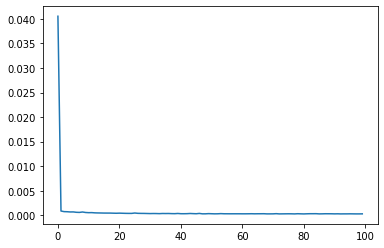

In [58]:
plt.plot(history.history['loss'])

In [72]:
test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
test.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2017,778.81,789.63,775.80,786.14,"16,57,300"
1,01-04-2017,788.36,791.34,783.16,786.90,"10,73,000"
2,01-05-2017,786.08,794.48,785.02,794.02,"13,35,200"
3,01-06-2017,795.26,807.90,792.20,806.15,"16,40,200"
4,01-09-2017,806.40,809.97,802.83,806.65,"12,72,400"


In [73]:
xtest = test[['Open']]

In [74]:
sc_xtest = sc.fit_transform(xtest)

In [75]:
x_test,y_test = feature_selection(n_steps,sc_xtest)

In [76]:
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))


In [77]:
y_pred = model.predict(x_test)

In [78]:
prediction = sc.inverse_transform(y_pred)

In [79]:
prediction

array([[805.54517],
       [807.18005],
       [807.76306],
       [817.30597],
       [824.12415],
       [830.4268 ],
       [832.3713 ],
       [814.01526]], dtype=float32)

In [80]:
y_test

array([0.47627119, 0.4820339 , 0.73711864, 0.86118644, 1.        ,
       0.94745763, 0.60762712, 0.3059322 ])

In [82]:
y_test_actual = sc.inverse_transform(y_test.reshape(-1,1))
y_test_actual

array([[806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [85]:
from sklearn.metrics import r2_score,mean_squared_error
print('mse',mean_squared_error(y_test_actual,prediction))
print('RMSE',np.sqrt(mean_squared_error(y_test_actual,prediction)))
print('r2_score',r2_score(y_test_actual,prediction))


mse 147.3082605120083
RMSE 12.137061444682907
r2_score 0.22321061788860197
